# Can we predict if a person makes more than or less than $50,000?

### Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Importing Dataframe

In [8]:
df = pd.read_csv('LoanStats_securev1_2019Q1.csv', header=1)
df.drop(df.tail(2).index,inplace=True)

### Data Cleaning
Variables used:\
**id** = A unique LC assigned ID for the loan listing.\
**annual_inc** = The self-reported annual income provided by the borrower during registration.\
**loan_amnt** = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.\
**purpose** = A category provided by the borrower for the loan request.\
**application_type** = Indicates whether the loan is an individual application or a joint application with two co-borrowers\
**grade** = LC assigned loan grade\
**emp_length** = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.\
**tot_hi_cred_lim** = Total high credit/credit limit\
**home_ownership** = The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER\
**addr_state** = The state provided by the borrower in the loan application\
**fico_range_low** = The lower boundary range the borrower’s FICO at loan origination belongs to.\
**dti** = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.\

In [9]:
# final pick
df1 = df[['id','annual_inc','loan_amnt','purpose','application_type','grade','emp_length','tot_hi_cred_lim','home_ownership','addr_state','fico_range_low','dti']]

# clean id to numeric
df1['id'] = pd.to_numeric(df1['id'])

# clean emp_length
df1 = df1.replace(to_replace=["< 1 year", "10+ years"], value=["0", "10"])
df1['emp_length'] = df1['emp_length'].str.replace('years','')
df1['emp_length'] = df1['emp_length'].str.replace('year','')
df1['emp_length'] = pd.to_numeric(df1['emp_length'])

# add more than 50k annual income column
def annual_inc_calculate(row):
    if row['annual_inc'] <= 50000:
        val = 0
    else:
        val = 1
    return val
df1['more_than_50k'] = df.apply(annual_inc_calculate, axis=1)

# limit dti
high_dti = df1[df1['dti'] > 100].index
df1.drop(high_dti, inplace=True)

# limit tot_hi_cred_lim
high_tot_hi_cred_lim = df1[df1['tot_hi_cred_lim'] > 1000000].index
df1.drop(high_tot_hi_cred_lim, inplace=True)

#show df
df1 = df1[['id','annual_inc','more_than_50k','loan_amnt','emp_length','tot_hi_cred_lim','fico_range_low','dti','purpose','application_type','grade','home_ownership','addr_state']]
df1

/Users/kennymiyasato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose,application_type,grade,home_ownership,addr_state
0,149328059,68000.0,1,13500.0,8.0,224894.0,750.0,15.74,debt_consolidation,Individual,A,MORTGAGE,PA
1,149420408,110000.0,1,20000.0,10.0,256497.0,675.0,23.44,major_purchase,Individual,D,RENT,NY
2,149453166,27840.0,0,1600.0,1.0,46994.0,685.0,15.99,other,Individual,B,RENT,TX
3,149491641,28000.0,0,6400.0,0.0,22700.0,700.0,8.62,debt_consolidation,Individual,C,RENT,NY
4,149513578,130000.0,1,25000.0,0.0,348856.0,695.0,23.27,small_business,Joint App,A,MORTGAGE,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,144957684,48000.0,0,5000.0,NaN,88613.0,735.0,8.28,home_improvement,Individual,C,MORTGAGE,FL
115671,143835299,96000.0,1,6000.0,0.0,33500.0,740.0,0.31,debt_consolidation,Individual,A,MORTGAGE,CT
115672,145177297,32000.0,0,16000.0,10.0,34200.0,685.0,20.89,debt_consolidation,Individual,C,MORTGAGE,CA
115673,145190854,72000.0,1,16000.0,5.0,251486.0,660.0,7.02,debt_consolidation,Individual,B,MORTGAGE,AZ


### Drops any NaN found

In [ ]:
df1 = df1.dropna()

In [10]:
y = df1[['more_than_50k']]
X = df1.drop(['id', 'annual_inc', 'more_than_50k', 'purpose',
     'application_type', 'grade', 'home_ownership', 'addr_state'], axis=1)

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

### EDA

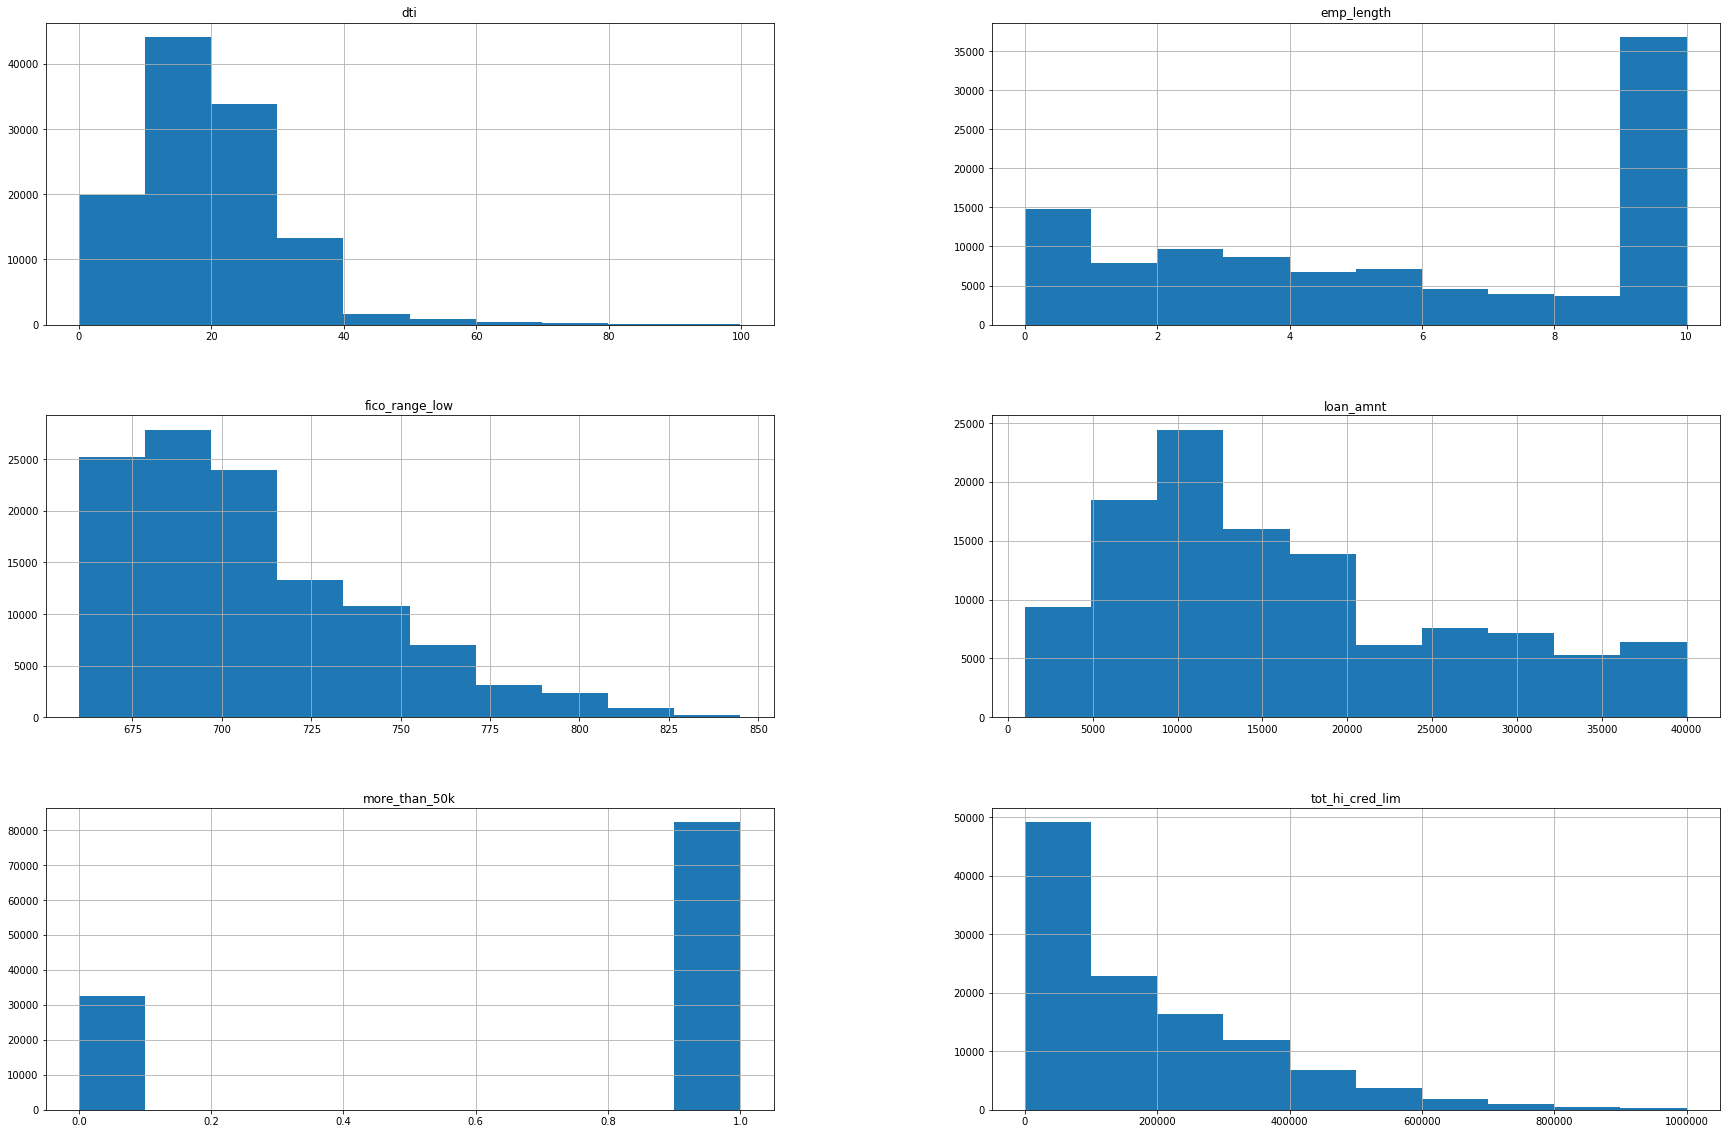

In [20]:
feat = df1.loc[:, 'more_than_50k':'dti']
feat.hist(figsize=(30,20));

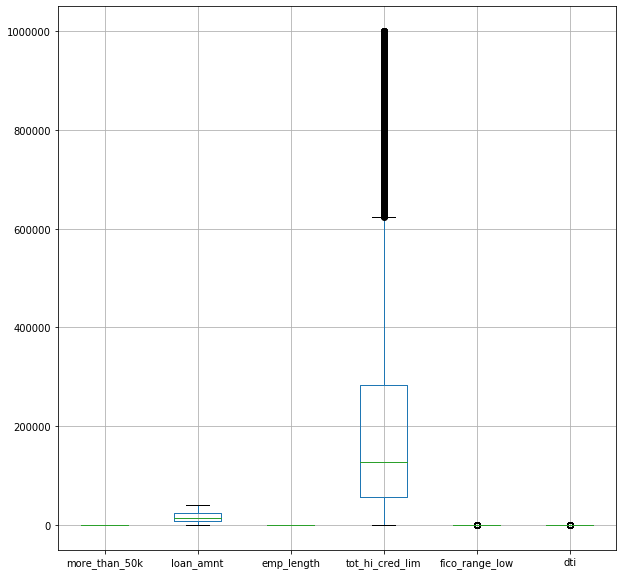

In [18]:
feat.boxplot(figsize=(10,10));

### Create dummies

In [15]:
df1 = pd.get_dummies(df1, drop_first=True)